In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [22]:
res_df = pd.read_csv('./data/RES_percentage_2022.csv', nrows=8760)
res_df.head()  

,Time (Hour-Ending),ERCOT.WIND.GEN,"Total Wind Installed, MW","Wind Output, % of Installed",ERCOT.PVGR.GEN,"Total Solar Installed, MW","Solar Output, % of Installed"
0,01/01/2022 01:00:00,12067,34173,35.31,0,9323,0.0
1,01/01/2022 02:00:00,12884,34173,37.70,0,9323,0.0
2,01/01/2022 03:00:00,14367,34173,42.04,0,9323,0.0
3,01/01/2022 04:00:00,16463,34173,48.18,0,9323,0.0
4,01/01/2022 05:00:00,18338,34173,53.66,0,9323,0.0


In [23]:
res_df["Hour"] = 0
res_df["Season"] = 0
print(res_df.shape)

(8760, 9)


In [24]:
wrong_format = []
for index, row in res_df.iterrows():
    res_df.loc[index,'Hour'] = index%24+1

    time_string = row['Time (Hour-Ending)']
    # print(index)
    month = int(time_string[0:2])
    if month==1 or month==2 or month == 12:
        res_df.loc[index,"Season"] = 'Winter'
    elif month >= 3 and month < 6:
        res_df.loc[index,"Season"] = 'Spring'
    elif month >= 6 and month < 9:
        res_df.loc[index,"Season"] = 'Summer'
    elif month >= 9 and month < 12:
        res_df.loc[index,"Season"] = 'Autumn'
    elif month>12:
        wrong_format.append(index)
print(wrong_format)
res_df.drop(wrong_format, inplace=True)
res_df.head()

[]


,Time (Hour-Ending),ERCOT.WIND.GEN,"Total Wind Installed, MW","Wind Output, % of Installed",ERCOT.PVGR.GEN,"Total Solar Installed, MW","Solar Output, % of Installed",Hour,Season
0,01/01/2022 01:00:00,12067,34173,35.31,0,9323,0.0,1,Winter
1,01/01/2022 02:00:00,12884,34173,37.70,0,9323,0.0,2,Winter
2,01/01/2022 03:00:00,14367,34173,42.04,0,9323,0.0,3,Winter
3,01/01/2022 04:00:00,16463,34173,48.18,0,9323,0.0,4,Winter
4,01/01/2022 05:00:00,18338,34173,53.66,0,9323,0.0,5,Winter


In [25]:
wind_mean_by_categories = res_df.groupby(['Season', 'Hour'])['Wind Output, % of Installed'].mean()

In [26]:
solar_mean_by_categories = res_df.groupby(['Season', 'Hour'])['Solar Output, % of Installed'].mean()

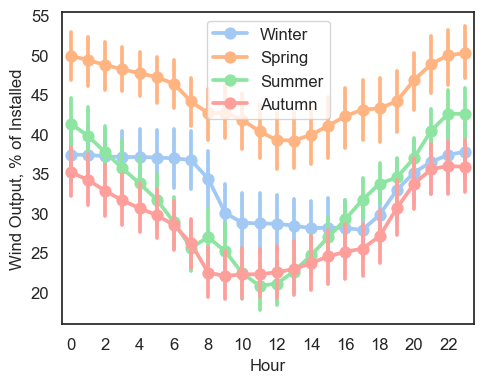

In [27]:
# 
# Plot the responses for different events and regions
fig = plt.figure(figsize=(5,4))
sns.set_theme(style="white")
sns.set_palette("pastel")
sns.pointplot(x="Hour", y="Wind Output, % of Installed",
             hue="Season",
             data=res_df)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.set(rc={"axes.labelsize": 14})

# Get every other x-axis tick and label
# Get the original x-axis tick positions and labels
original_xticks, original_labels = plt.xticks()
custom_xticks = original_xticks[::2]  # Select every second element in the x list
custom_labels = [str(label) for label in custom_xticks]  # Convert the positions to labels

# Set custom x-axis ticks and labels
plt.xticks(custom_xticks, custom_labels)

fig.tight_layout()
plt.savefig("./pics/wind_profile.pdf")

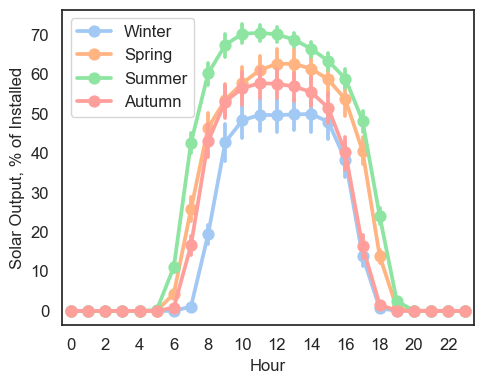

In [28]:
fig = plt.figure(figsize=(5,4))
sns.set_theme(style="white")
sns.set_palette("pastel")
sns.pointplot(x="Hour", y="Solar Output, % of Installed",
             hue="Season",
             data=res_df)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.set(rc={"axes.labelsize": 14})
# Get every other x-axis tick and label
# Get the original x-axis tick positions and labels
original_xticks, original_labels = plt.xticks()
custom_xticks = original_xticks[::2]  # Select every second element in the x list
custom_labels = [str(label) for label in custom_xticks]  # Convert the positions to labels

# Set custom x-axis ticks and labels
plt.xticks(custom_xticks, custom_labels)



fig.tight_layout()
plt.savefig("./pics/solar_profile.pdf")

In [29]:
print(wind_mean_by_categories)
print(solar_mean_by_categories)

Season  Hour
Autumn  1       35.112527
        2       34.119451
        3       32.754615
        4       31.540220
        5       30.557692
                  ...    
Winter  20      32.869444
        21      35.041667
        22      36.423667
        23      37.306778
        24      37.720667
Name: Wind Output, % of Installed, Length: 96, dtype: float64
Season  Hour
Autumn  1       0.000220
        2       0.000220
        3       0.000220
        4       0.000220
        5       0.000220
                  ...   
Winter  20      0.021889
        21      0.013222
        22      0.013333
        23      0.013222
        24      0.013111
Name: Solar Output, % of Installed, Length: 96, dtype: float64


In [30]:
print(np.array(wind_mean_by_categories["Winter"]))

[37.34388889 37.302      37.13133333 37.01477778 37.04322222 36.96533333
 36.86955556 36.64733333 34.29922222 29.93544444 28.70122222 28.63344444
 28.57733333 28.34455556 28.02611111 28.09444444 28.03688889 27.81277778
 29.71911111 32.86944444 35.04166667 36.42366667 37.30677778 37.72066667]


In [31]:
print(np.array(wind_mean_by_categories["Summer"]))

[41.23934783 39.70043478 37.61673913 35.61956522 33.69608696 31.64869565
 28.80315217 25.5251087  26.89293478 25.08630435 22.30728261 20.73630435
 21.01293478 22.53380435 24.60728261 26.87586957 29.15423913 31.61347826
 33.67141304 34.4425     36.89467391 40.35869565 42.52902174 42.46423913]


In [32]:
print(np.array(solar_mean_by_categories["Winter"]))

[1.30000000e-02 1.30000000e-02 1.31111111e-02 1.30000000e-02
 9.00000000e-03 6.88888889e-03 5.77777778e-03 1.08033333e+00
 1.93971111e+01 4.28098889e+01 4.83293333e+01 4.97325556e+01
 4.96512222e+01 4.98350000e+01 4.99392222e+01 4.80010000e+01
 3.83207778e+01 1.39814444e+01 6.94222222e-01 2.18888889e-02
 1.32222222e-02 1.33333333e-02 1.32222222e-02 1.31111111e-02]


In [33]:
print(np.array(solar_mean_by_categories["Summer"]))

[6.73913043e-03 1.84782609e-03 2.06521739e-03 1.52173913e-03
 7.60869565e-04 2.02065217e-01 1.11309783e+01 4.26120652e+01
 6.02289130e+01 6.74796739e+01 7.02983696e+01 7.05294565e+01
 7.01564130e+01 6.88207609e+01 6.65180435e+01 6.33994565e+01
 5.89408696e+01 4.82770652e+01 2.41082609e+01 2.52641304e+00
 4.38043478e-02 1.26086957e-02 6.73913043e-03 8.26086957e-03]


In [34]:
np.savez('.\Interresult\wind_winter.npz', data=np.array(wind_mean_by_categories["Winter"]))
np.savez('.\Interresult\wind_summer.npz', data=np.array(wind_mean_by_categories["Summer"]))
np.savez('.\Interresult\solar_winter.npz', data=np.array(solar_mean_by_categories["Winter"]))
np.savez('.\Interresult\solar_summer.npz', data=np.array(solar_mean_by_categories["Summer"]))

In [35]:
# Specify the column containing the values
column_to_check = 'Solar Output, % of Installed'

# Calculate the 0.1 quantile value
quantile_value = res_df[column_to_check].quantile(0.1)

# Create a boolean mask for values greater than the quantile
mask = res_df[column_to_check] >= quantile_value

# Apply the mask to filter the DataFrame
filtered_df = res_df[mask]

solar_min_by_categories = filtered_df.groupby(['Season', 'Hour'])['Solar Output, % of Installed'].min()
solar_min_summer = solar_min_by_categories["Summer"].values
print(solar_min_summer)


[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.500e-01
 9.840e+00 1.975e+01 2.933e+01 3.510e+01 3.837e+01 4.045e+01 4.267e+01
 3.928e+01 3.043e+01 1.984e+01 1.233e+01 2.820e+00 1.000e-02 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]


In [36]:
import scipy.io


# Save the data in a format compatible with MATLAB
scipy.io.savemat('..\Robust Optimization\inter_data\solar_min_summer.mat', {'data': solar_min_summer})

In [37]:
# Specify the column containing the values
column_to_check = 'Wind Output, % of Installed'

# Calculate the 0.1 quantile value
quantile_value = res_df[column_to_check].quantile(0.1)

# Create a boolean mask for values greater than the quantile
mask = res_df[column_to_check] >= quantile_value

# Apply the mask to filter the DataFrame
filtered_df = res_df[mask]

wind_min_by_categories = filtered_df.groupby(['Season', 'Hour'])['Wind Output, % of Installed'].min()
wind_min_summer = wind_min_by_categories["Summer"].values
print(wind_min_summer)
scipy.io.savemat('..\Robust Optimization\inter_data\wind_min_summer.mat', {'data': wind_min_summer})

[10.8  10.55 11.95 10.74 10.82 11.16 10.39 10.55 10.83 10.25 10.47 10.6
 10.57 10.59 10.25 10.81 12.71 13.44 11.22 10.81 10.92 13.27 11.83 10.79]


In [38]:
# Convert the 'Time (Hour-Ending)' column to a datetime object
res_df['Time (Hour-Ending)'] = pd.to_datetime(res_df['Time (Hour-Ending)'], format='%m/%d/%Y %H:%M:%S')

# Filter the DataFrame to get all rows containing data for '08/01/2022'
date_to_filter = '08/01/2022'
filtered_df = res_df[res_df['Time (Hour-Ending)'].dt.strftime('%m/%d/%Y') == date_to_filter]

print(filtered_df)

      Time (Hour-Ending)  ERCOT.WIND.GEN  Total Wind Installed, MW  \
5086 2022-08-01 00:00:00           18711                     35563   
5087 2022-08-01 01:00:00           19029                     35563   
5088 2022-08-01 02:00:00           19080                     35563   
5089 2022-08-01 03:00:00           19061                     35563   
5090 2022-08-01 04:00:00           19129                     35563   
5091 2022-08-01 05:00:00           18576                     35563   
5092 2022-08-01 06:00:00           18280                     35563   
5093 2022-08-01 07:00:00           17309                     35563   
5094 2022-08-01 08:00:00           15055                     35563   
5095 2022-08-01 09:00:00           13002                     35563   
5096 2022-08-01 10:00:00           13649                     35563   
5097 2022-08-01 11:00:00           12313                     35563   
5098 2022-08-01 12:00:00            8931                     35563   
5099 2022-08-01 13:0

In [39]:
# Extract the 'Column1' and 'Column2' data as arrays
windF_array = filtered_df['Wind Output, % of Installed'].to_numpy()
solarF_array = filtered_df['Solar Output, % of Installed'].to_numpy()
print(windF_array)
print(solarF_array)

[52.61 53.51 53.65 53.6  53.79 52.23 51.4  48.67 42.33 36.56 38.38 34.62
 25.11 20.58 19.93 21.44 26.83 31.21 33.97 37.97 42.12 43.72 48.12 52.24]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.000e-02 8.200e+00 4.524e+01 6.318e+01 6.960e+01 6.881e+01 7.139e+01
 7.301e+01 7.341e+01 7.241e+01 6.946e+01 6.594e+01 5.590e+01 2.709e+01
 2.650e+00 0.000e+00 0.000e+00]


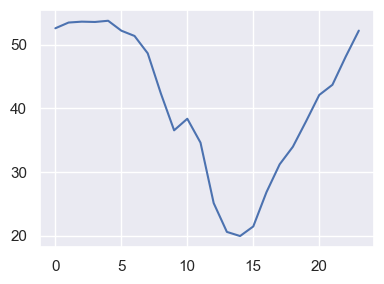

In [41]:
fig2 = plt.figure(figsize=(4,3))
plt.plot(range(24), windF_array )
fig2.tight_layout()
# plt.savefig("./pics/wind_forecat.pdf")

In [ ]:
# scipy.io.savemat('../robust optimization/inter_data/wind_fore_summer.mat', {'data': windF_array})
# scipy.io.savemat('../robust optimization/inter_data/solar_fore_summer.mat', {'data': solarF_array})